In [1]:
import pandas as pd
import numpy as np

In [4]:
beer_df = pd.read_csv("data/beerAdvocateReviewsUSA.csv")

In [5]:
beer_df.head(2)

,Unnamed: 0,rating,appearance,aroma,palate,taste,overall,country_name,country_code3,state,date_object,month,year,style,beer_name,beer_id
0,0,2.88,3.25,2.75,3.25,2.75,3.0,United States,USA,Washington,2015-08-20 12:00:00,8,2015,Euro Pale Lager,Régab,142544
1,1,3.67,3.00,3.50,3.50,4.00,3.5,United States,USA,New York,2009-02-20 12:00:00,2,2009,English Pale Ale,Barelegs Brew,19590


In [6]:
beer_df['year'].unique()

array([2015, 2009, 2013, 2012, 2011, 2010, 2007, 2004, 2016, 2003, 2002,
       2006, 2005, 2008, 2014, 2017])

In [34]:
ghcn_df = pd.read_csv("data/GHCN-daily-us-2017.csv")
print(ghcn_df.shape)

(127181, 6)


In [22]:
ghcn_df.head(3)

,STATION,NAME,DATE,PRCP,TAVG,TMAX
0,USC00340184,"ALTUS DAM, OK US",2017-01-01,0.00,NaN,56.0
1,USC00340184,"ALTUS DAM, OK US",2017-01-02,0.05,NaN,66.0
2,USC00340184,"ALTUS DAM, OK US",2017-01-03,0.00,NaN,65.0


In [23]:
nan_counts = ghcn_df[['PRCP', 'TAVG', 'TMAX']].isna().sum()
zero_counts = (ghcn_df[['PRCP', 'TAVG', 'TMAX']] == 0.0).sum()

print("NaN counts:")
print(nan_counts)
print("\n0.0 counts:")
print(zero_counts)

NaN counts:
PRCP      2135
TAVG    120413
TMAX     28657
dtype: int64

0.0 counts:
PRCP    90672
TAVG        3
TMAX       33
dtype: int64


In [35]:
stations_df = pd.read_csv("data/weather-stations.csv")
print(stations_df.shape)

(1000, 9)


In [27]:
stations_df.head(3)

,STATION_ID,STATION,BEGIN_DATE,END_DATE,STATE,COUNTRY,LATITUDE,LONGITUDE,ELEVATION_(M)
0,GHCND:USC00112931,"1 ENE FAIRFIELD, IL US",1895-07-07,2024-12-17,Illinois,United States,38.39055,-88.35017,140.8
1,GHCND:USC00115515,"1 N MCLEANSBORO, IL US",1893-01-01,2024-12-10,Illinois,United States,38.10062,-88.53300,150.0
2,GHCND:USC00127125,"1 WSW PRINCETON, IN US",1893-01-01,2024-12-17,Indiana,United States,38.35178,-87.59257,137.2


In [36]:
stations_df['STATION_ID'] = stations_df['STATION_ID'].str.replace('GHCND:', '')
stations_df.head()

,STATION_ID,STATION,BEGIN_DATE,END_DATE,STATE,COUNTRY,LATITUDE,LONGITUDE,ELEVATION_(M)
0,USC00112931,"1 ENE FAIRFIELD, IL US",1895-07-07,2024-12-17,Illinois,United States,38.39055,-88.35017,140.8
1,USC00115515,"1 N MCLEANSBORO, IL US",1893-01-01,2024-12-10,Illinois,United States,38.10062,-88.53300,150.0
2,USC00127125,"1 WSW PRINCETON, IN US",1893-01-01,2024-12-17,Indiana,United States,38.35178,-87.59257,137.2
3,USC00510006,"AAKUKUI 1007, HI US",1919-01-01,1963-05-01,Hawaii,United States,21.95000,-159.43333,107.0
4,USC00090006,"ABBEVILLE RIVER, GA US",2009-07-01,2012-10-01,Georgia,United States,31.99380,-83.30900,74.1


In [37]:
# Merge ghcn_df with stations_df to add the state column
ghcn_df = ghcn_df.merge(stations_df[['STATION_ID', 'STATE']], left_on='STATION', right_on='STATION_ID', how='left')

# Drop the STATION_ID column as it is no longer needed
ghcn_df.drop(columns=['STATION_ID'], inplace=True)
ghcn_df.drop(columns=['NAME'], inplace=True)

# Display the first few rows to verify the merge
ghcn_df.head(3)

,STATION,DATE,PRCP,TAVG,TMAX,STATE
0,USC00340184,2017-01-01,0.00,NaN,56.0,Oklahoma
1,USC00340184,2017-01-02,0.05,NaN,66.0,Oklahoma
2,USC00340184,2017-01-03,0.00,NaN,65.0,Oklahoma


In [39]:
ghcn_df[['PRCP', 'TAVG', 'TMAX', 'STATE']].isna().sum()

PRCP       2135
TAVG     120413
TMAX      28657
STATE         0
dtype: int64

In [40]:
ghcn_df = ghcn_df.dropna(subset=['TMAX'])

In [41]:
ghcn_df.head()

,STATION,DATE,PRCP,TAVG,TMAX,STATE
0,USC00340184,2017-01-01,0.00,NaN,56.0,Oklahoma
1,USC00340184,2017-01-02,0.05,NaN,66.0,Oklahoma
2,USC00340184,2017-01-03,0.00,NaN,65.0,Oklahoma
3,USC00340184,2017-01-04,0.00,NaN,44.0,Oklahoma
4,USC00340184,2017-01-05,0.00,NaN,42.0,Oklahoma


In [ ]:
grouped_ghcn_df = ghcn_df.groupby(['STATE', 'DATE']).agg({'TMAX': 'median'}).reset_index()
grouped_ghcn_df.rename(columns={'TMAX': 'MEDIAN_TMAX'}, inplace=True)
grouped_ghcn_df.shape

(16374, 3)

In [69]:
grouped_ghcn_df.head(4)

,STATE,DATE,MEDIAN_TMAX
0,Alabama,2017-01-01,63.0
1,Alabama,2017-01-02,64.0
2,Alabama,2017-01-03,64.5
3,Alabama,2017-01-04,57.5


In [52]:
grouped_ghcn_df['STATE'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [70]:
grouped_ghcn_df[grouped_ghcn_df['STATE'] == 'Wyoming']

,STATE,DATE,MEDIAN_TMAX
16009,Wyoming,2017-01-01,29.0
16010,Wyoming,2017-01-02,23.0
16011,Wyoming,2017-01-03,17.0
16012,Wyoming,2017-01-04,16.0
16013,Wyoming,2017-01-05,10.0
...,...,...,...
16369,Wyoming,2017-12-27,29.0
16370,Wyoming,2017-12-28,34.0
16371,Wyoming,2017-12-29,38.0
16372,Wyoming,2017-12-30,42.0


In [84]:
# beer_df['date_object']
beer_df.head(5)

,Unnamed: 0,rating,appearance,aroma,palate,taste,overall,country_name,country_code3,state,date_object,month,year,style,beer_name,beer_id
0,0,2.88,3.25,2.75,3.25,2.75,3.00,United States,USA,Washington,2015-08-20 12:00:00,8,2015,Euro Pale Lager,Régab,142544
1,1,3.67,3.00,3.50,3.50,4.00,3.50,United States,USA,New York,2009-02-20 12:00:00,2,2009,English Pale Ale,Barelegs Brew,19590
2,5,3.91,4.25,4.50,3.25,3.75,3.75,United States,USA,North Carolina,2013-02-13 12:00:00,2,2013,English Pale Ale,Legbiter,19827
3,6,3.64,4.00,3.75,3.50,3.50,3.75,United States,USA,New York,2013-01-09 12:00:00,1,2013,English Pale Ale,Legbiter,19827
4,7,2.77,3.00,3.50,2.50,2.50,2.50,United States,USA,Illinois,2012-11-17 12:00:00,11,2012,English Pale Ale,Legbiter,19827


In [83]:
beer_df['state'].unique().size

50

In [85]:
beer_df['date_object'] = beer_df['date_object'].str.split(' ').str[0]
beer_df.head(5)

,Unnamed: 0,rating,appearance,aroma,palate,taste,overall,country_name,country_code3,state,date_object,month,year,style,beer_name,beer_id
0,0,2.88,3.25,2.75,3.25,2.75,3.00,United States,USA,Washington,2015-08-20,8,2015,Euro Pale Lager,Régab,142544
1,1,3.67,3.00,3.50,3.50,4.00,3.50,United States,USA,New York,2009-02-20,2,2009,English Pale Ale,Barelegs Brew,19590
2,5,3.91,4.25,4.50,3.25,3.75,3.75,United States,USA,North Carolina,2013-02-13,2,2013,English Pale Ale,Legbiter,19827
3,6,3.64,4.00,3.75,3.50,3.50,3.75,United States,USA,New York,2013-01-09,1,2013,English Pale Ale,Legbiter,19827
4,7,2.77,3.00,3.50,2.50,2.50,2.50,United States,USA,Illinois,2012-11-17,11,2012,English Pale Ale,Legbiter,19827


In [91]:
grouped_beer_df = beer_df[beer_df['year'] == 2017].groupby(['state', 'date_object']).agg({'rating': 'mean'}).reset_index()
group_sizes = beer_df[beer_df['year'] == 2017].groupby(['state', 'date_object']).size().reset_index(name='count')
grouped_beer_df = grouped_beer_df.merge(group_sizes, on=['state', 'date_object'])
grouped_beer_df.shape

(8566, 4)

In [92]:
grouped_beer_df.head(4)

,state,date_object,rating,count
0,Alabama,2017-01-01,4.0600,5
1,Alabama,2017-01-02,4.3025,4
2,Alabama,2017-01-04,3.7350,2
3,Alabama,2017-01-05,3.6600,1


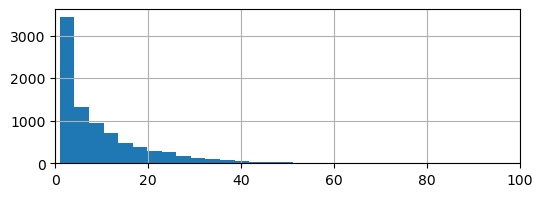

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 2))
plt.xlim(0, 100)
grouped_beer_df['count'].hist(bins=100)
plt.show()

In [102]:
merged_df = pd.merge(grouped_beer_df, grouped_ghcn_df, left_on=['state', 'date_object'], right_on=['STATE', 'DATE'])
merged_df.shape

(7774, 7)

In [121]:
merged_df[merged_df['state'] == 'North Dakota']

,state,date_object,rating,count,STATE,DATE,MEDIAN_TMAX
5350,North Dakota,2017-02-10,4.558333,6,North Dakota,2017-02-10,27.0
5351,North Dakota,2017-02-20,3.850000,1,North Dakota,2017-02-20,50.0
5352,North Dakota,2017-03-25,1.240000,1,North Dakota,2017-03-25,48.0
5353,North Dakota,2017-07-19,4.800000,1,North Dakota,2017-07-19,79.0
5354,North Dakota,2017-07-29,4.260000,1,North Dakota,2017-07-29,85.0


In [127]:
from scipy.stats import pearsonr

def calculate_corr_pval(x):
    corr, pval = pearsonr(x['rating'], x['MEDIAN_TMAX'])
    return pd.Series({'correlation': corr, 'p_value': pval})

state_corr_pvals = merged_df.groupby('state').apply(calculate_corr_pval)
state_corr_pvals
# state_correlations = merged_df.groupby('state').apply(lambda x: x['rating'].corr(x['MEDIAN_TMAX']))
# state_correlations
#california_df = merged_df[merged_df['state'] == 'California']
#pearson_corr = california_df['rating'].corr(california_df['MEDIAN_TMAX'])

C:\Users\cmnue\AppData\Local\Temp\ipykernel_9604\415400362.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_corr_pvals = merged_df.groupby('state').apply(calculate_corr_pval)


,correlation,p_value
state,,
Alabama,-0.074259,4.066908e-01
Alaska,0.170128,3.687539e-01
Arizona,-0.023883,7.314098e-01
Arkansas,-0.061537,4.015113e-01
California,0.007021,9.188664e-01
Colorado,0.101990,1.407501e-01
Connecticut,-0.248637,3.137798e-04
Florida,-0.047055,4.966151e-01
Georgia,0.066396,3.406608e-01


In [128]:
significant_corrs = state_corr_pvals[state_corr_pvals['p_value'] < 0.05]
significant_corrs

,correlation,p_value
state,,
Connecticut,-0.248637,3.137798e-04
Illinois,-0.154597,2.437273e-02
Louisiana,0.229962,2.202702e-03
Maine,-0.217890,1.790796e-03
Massachusetts,-0.150172,2.919848e-02
Michigan,-0.150438,2.852858e-02
Mississippi,-0.226065,4.047867e-03
Nevada,0.202474,1.023791e-02
New York,-0.396184,2.218154e-09


In [138]:
merge_with_states(sample_data)

,state,correlation,abbreviation
0,Alabama,-0.095421,AL
1,Alaska,0.660200,AK
2,Arizona,-0.103147,AZ
3,Arkansas,0.873834,AR
4,California,-0.600897,CA
5,Colorado,0.006079,CO
6,Connecticut,0.754363,CT
7,Delaware,-0.140506,DE
8,Florida,0.347582,FL
9,Georgia,0.419809,GA


In [140]:
merge_with_states(significant_corrs)

,state,correlation,p_value,abbreviation
0,Connecticut,-0.248637,3.137798e-04,CT
1,Illinois,-0.154597,2.437273e-02,IL
2,Louisiana,0.229962,2.202702e-03,LA
3,Maine,-0.217890,1.790796e-03,ME
4,Massachusetts,-0.150172,2.919848e-02,MA
5,Michigan,-0.150438,2.852858e-02,MI
6,Mississippi,-0.226065,4.047867e-03,MS
7,Nevada,0.202474,1.023791e-02,NV
8,New York,-0.396184,2.218154e-09,NY
9,Utah,0.228855,4.116066e-02,UT


In [143]:
import plotly.express as px
from src.utils.preProcessingHelper import merge_with_states 

# Generate sample data for plotting
sample_data = pd.DataFrame({
    'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia'],
    'correlation': np.random.uniform(-1, 1, 10)
})

# Display the sample data
# sample_data

fig = px.choropleth(merge_with_states(significant_corrs), 
                    locations='abbreviation', 
                    locationmode='USA-states', 
                    color='correlation', 
                    color_continuous_scale="Viridis",
                    scope="usa",
                    title='Significant Correlations by State')
fig.show()

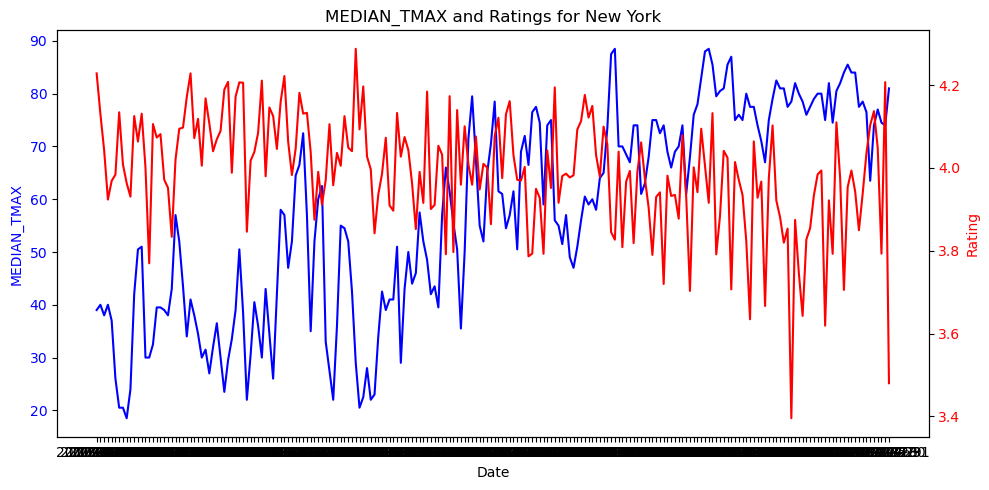

In [119]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MEDIAN_TMAX on the left y-axis
ax1.plot(new_york_df['date_object'], new_york_df['MEDIAN_TMAX'], label='MEDIAN_TMAX', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('MEDIAN_TMAX', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the ratings
ax2 = ax1.twinx()
ax2.plot(new_york_df['date_object'], new_york_df['rating'], label='Rating', color='red')
ax2.set_ylabel('Rating', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('MEDIAN_TMAX and Ratings for New York')
fig.tight_layout()

# Show the plot
plt.show()

In [123]:
merged_big_df = pd.merge(beer_df[beer_df['year'] == 2017], grouped_ghcn_df, left_on=['state', 'date_object'], right_on=['STATE', 'DATE'])
merged_big_df.shape

(79454, 19)

In [125]:
merged_big_df = merged_big_df[['rating', 'STATE', 'DATE', 'MEDIAN_TMAX']]
merged_big_df.head(3)

,rating,STATE,DATE,MEDIAN_TMAX
0,3.79,Connecticut,2017-04-17,81.0
1,3.71,New York,2017-02-22,52.0
2,3.84,New York,2017-02-23,64.5


In [126]:
from scipy.stats import pearsonr

def calculate_corr_pval(x):
    corr, pval = pearsonr(x['rating'], x['MEDIAN_TMAX'])
    return pd.Series({'correlation': corr, 'p_value': pval})

state_corr_pvals = merged_big_df.groupby('STATE').apply(calculate_corr_pval)
state_corr_pvals

C:\Users\cmnue\AppData\Local\Temp\ipykernel_9604\215790640.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_corr_pvals = merged_big_df.groupby('STATE').apply(calculate_corr_pval)


,correlation,p_value
STATE,,
Alabama,-0.058949,3.309648e-01
Alaska,0.114283,5.068945e-01
Arizona,-0.034209,2.683061e-01
Arkansas,-0.066676,1.425828e-01
California,-0.007777,5.761838e-01
Colorado,-0.003601,8.474811e-01
Connecticut,-0.118701,8.551317e-07
Florida,-0.038652,6.600311e-02
Georgia,-0.007643,7.580279e-01
